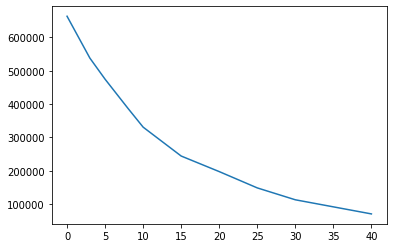

In [1]:
import os
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib 

# assign path
path, dirs, files = next(os.walk("./muestras/"))
file_count = len(files)

# declaring functions 
def get_max_value(filename):  
  csv_data = pd.read_csv(filename,delimiter=';',skiprows=36)
  csv_data['Intensity'] = csv_data['Intensity'].apply(lambda x: float(x.replace(',','.')))
  max_intensity = csv_data["Intensity"].max()
  return max_intensity

def get_average_list(file_count):
    # declaring temp variables 
    concentration_list_temp = []
    list_concentration_avg_intensity = []
    concentration_temp = ''
    
    # proccesing data 
    for i in range(file_count):
        concentration = files[i].split()[0]
        if concentration == 'control':
                concentration = '0'

        max_intensity = get_max_value("./muestras/"+files[i])

        if concentration == concentration_temp or concentration_temp == '':
            concentration_list_temp.append(max_intensity)
            concentration_temp = concentration

        if (concentration != concentration_temp and concentration_temp != '') or i == file_count-1:
            mean = sum(concentration_list_temp)/float(len(concentration_list_temp))
            temp_dicctionary = {
                'concentration[uM]': int(re.findall(r'\d+', concentration_temp)[0]),
                'media[Fi]': mean
            }
            concentration_list_temp = []
            concentration_list_temp.append(max_intensity)
            concentration_temp = concentration
            list_concentration_avg_intensity.append(temp_dicctionary)
    
    return list_concentration_avg_intensity

def get_df(list):
  df_concentration_avg_intensity = pd.DataFrame(list) 
  df_concentration_avg_intensity.sort_values(by=['concentration[uM]'], inplace=True, ascending=True)
  return df_concentration_avg_intensity

def plot_data(df, x, y):
  plt.plot(df[x], df[y])

def main():
  concentration_intensity_list = get_average_list(file_count)
  df_concentration_avg_intensity = get_df(concentration_intensity_list)
  plot_data(df_concentration_avg_intensity, 'concentration[uM]', 'media[Fi]' )
  

  # print(df_concentration_avg_intensity, 'concentration[uM]', 'media[Fi]' )

main()